# Simple Bayesian network example

Monty Hall Problem

We are in a game show. We have 3 doors.
Behind one door is a prize. Behind the others there's nothing.

You have to select one door.
Let's say you pick no 1.
The host, who knows what's behind each door, opens another door, e.g. no 3, which has nothing.
Now, you have one last chance before the game ends: do you want to change your mind and select door no 2?

In [1]:
# We have 3 random variables in this setting:
# Contestant (C)
# Host (H)
# Prize (P)

# Structure:

#   (P)     (C)
#    \     /
#     \   /
#      \ /  
#      (H)

# Let's see the Conditional probability distributions:

# P(C):
# C   0     1     2
#    0.33  0.33  0.33

# P(P):
# P   0     1     2
#    0.33  0.33  0.33

# P(H | P,C):

# +-----+-----------------+-----------------+-----------------+
# | C   |        0        |        1        |        2        |
# +-----+-----+-----+-----+-----+-----+-----+-----------------+
# | P   |  0  |  1  |  2  |  0  |  1  |  2  |  0  |  1  |  2  |
# +=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
# | H=0 |  0  |  0  |  0  |  0  | 0.5 |  1  |  0  |  1  | 0.5 |
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
# | H=1 | 0.5 |  0  |  1  |  0  |  0  |  0  |  1  |  0  | 0.5 |
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
# | H=2 | 0.5 |  1  |  0  |  1  | 0.5 |  0  |  0  |  0  |  0  |
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+



In [2]:
# Import the libraries
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

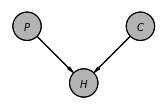

In [3]:
# Define the network structure
model = BayesianNetwork([('C', 'H'), ('P', 'H')])
model.to_daft(node_pos={'P':(0,0), 'C':(2,0), 'H':(1,-1)}).render()

In [4]:
# Defining the CPDs:

cpd_c = TabularCPD('C', 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD('P', 3, [[0.33], [0.33], [0.33]])
cpd_h = TabularCPD('H', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                   evidence=['C', 'P'], evidence_card=[3, 3])   # variables that constitute evidence & cardinality

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)

model.get_cpds()

[<TabularCPD representing P(C:3) at 0x7f9a3f257f98>,
 <TabularCPD representing P(P:3) at 0x7f9a3f257f60>,
 <TabularCPD representing P(H:3 | C:3, P:3) at 0x7f9a3f257fd0>]

In [5]:
# Sanity check
model.check_model()

True

In [6]:
# List independencies between variables
model.get_independencies()

(C ⟂ P)
(P ⟂ C)

In [7]:
# Get the markov blanket for a variable.
# The markov blanket is the set of node’s parents, its children and its children’s other parents.
model.get_markov_blanket('H')

['C', 'P']

In [11]:
# Let's print the CPDs to see what we have defined so far
print(cpd_c)
print('')
print(cpd_p)
print('')
print(cpd_h)

+------+------+
| C(0) | 0.33 |
+------+------+
| C(1) | 0.33 |
+------+------+
| C(2) | 0.33 |
+------+------+

+------+------+
| P(0) | 0.33 |
+------+------+
| P(1) | 0.33 |
+------+------+
| P(2) | 0.33 |
+------+------+

+------+------+------+------+------+------+------+------+------+------+
| C    | C(0) | C(0) | C(0) | C(1) | C(1) | C(1) | C(2) | C(2) | C(2) |
+------+------+------+------+------+------+------+------+------+------+
| P    | P(0) | P(1) | P(2) | P(0) | P(1) | P(2) | P(0) | P(1) | P(2) |
+------+------+------+------+------+------+------+------+------+------+
| H(0) | 0.0  | 0.0  | 0.0  | 0.0  | 0.5  | 1.0  | 0.0  | 1.0  | 0.5  |
+------+------+------+------+------+------+------+------+------+------+
| H(1) | 0.5  | 0.0  | 1.0  | 0.0  | 0.0  | 0.0  | 1.0  | 0.0  | 0.5  |
+------+------+------+------+------+------+------+------+------+------+
| H(2) | 0.5  | 1.0  | 0.0  | 1.0  | 0.5  | 0.0  | 0.0  | 0.0  | 0.0  |
+------+------+------+------+------+------+------+----

In [21]:
# Get the active trails
# For any two variables A and B in a network, if any change in A influences the values of B,
# then we say that there is an active trail between A and B.

# So, in our example: 
# a change in C affects H, but not P
# a change in P affects H, but not C
# a change in H affects C and P
print(model.active_trail_nodes('C'))
print(model.active_trail_nodes('P'))
print(model.active_trail_nodes('H'))

{'C': {'C', 'H'}}
{'P': {'H', 'P'}}
{'H': {'H', 'C', 'P'}}


In [7]:
# OK, now we have defined and explored the network.
# Let's continue with the game:
# This is where we initially choose to select door no. 0
# And the host chooses to open door no. 2

# So, the new evidence that will update our beliefs is:
# C = 0
# H = 2

# What is the posterior probability for prize?

# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['P'], evidence={'C': 0, 'H': 2})
print(posterior_p)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3333 |
+------+----------+
| P(1) |   0.6667 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+


In [8]:
# The new evidence updated our beliefs, 
# so we have a better estimation of the probabilities now for where the price could be.
# So, we should switch doors.